<a href="https://colab.research.google.com/github/MUTHYALA-SANJAYREDDY/Audio_Steganography/blob/main/Audio_steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below code can be used to change the format of existing wav file to PCM format wav file

In [ ]:
!ffmpeg -i /content/sample_data/resistance.wav -ar 44100 -ac 1 -f wav /content/sample_data/resistance_input.wav

To convert the mp3 file to wav file

In [ ]:
import wave

try:
    with wave.open("/content/sample_data/output.wav", 'rb') as audio:
        print("Number of channels:", audio.getnchannels())
        print("Sample width:", audio.getsampwidth())
        print("Frame rate (sample rate):", audio.getframerate())
        print("Number of frames:", audio.getnframes())
        print("Compression type:", audio.getcomptype())
except wave.Error as e:
    print("Wave error:", e)


To extract the audio wav file from the video(mp4)

In [ ]:
!pip install pydub

In [34]:
from pydub import AudioSegment

# Paths
mp3_file_path = '/content/sample_data/input_audio.mp3'  # Replace with your MP3 file path
wav_file_path = '/content/sample_data/input_audio_converted.wav'

# Convert MP3 to WAV
audio = AudioSegment.from_mp3(mp3_file_path)
audio.export(wav_file_path, format="wav")
print(f"Converted MP3 to WAV: {wav_file_path}")


Converted MP3 to WAV: /content/sample_data/input_audio_converted.wav


In [1]:
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [2]:
import os

# Paths
video_file_path = '/content/sample_data/video.mp4'  # Replace with your video file path
audio_file_path = '/content/sample_data/audio.wav'  # Save extracted audio as WAV

# Extract audio using FFmpeg
os.system(f'ffmpeg -i "{video_file_path}" -q:a 0 -map a "{audio_file_path}"')
print(f"Audio extracted and saved at: {audio_file_path}")


Audio extracted and saved at: /content/sample_data/audio.wav


In [3]:
import os

# Paths
video_file_path = '/content/sample_data/video1.mp4'  # Replace with your video file path
audio_file_path = '/content/sample_data/audio1.wav'  # Save extracted audio as WAV

# Extract audio using FFmpeg
os.system(f'ffmpeg -i "{video_file_path}" -q:a 0 -map a "{audio_file_path}"')
print(f"Audio extracted and saved at: {audio_file_path}")


Audio extracted and saved at: /content/sample_data/audio1.wav


**AES ENCRYPTION**

In [ ]:
!pip install Crypto

In [ ]:
!pip install pycryptodome

In [6]:
import wave
import os
import random
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64

def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(message.encode('utf-8'), AES.block_size))  # Ensure UTF-8 encoding
    iv_ciphertext = cipher.iv + ciphertext  # Concatenate IV with ciphertext
    return base64.b64encode(iv_ciphertext).decode('utf-8')  # Return as a UTF-8 string

def aes_decrypt(encrypted_message, key):
    raw_data = base64.b64decode(encrypted_message)  # Decode base64 to raw bytes
    iv = raw_data[:AES.block_size]  # Get IV from the beginning
    ciphertext = raw_data[AES.block_size:]  # Extract ciphertext from the remaining bytes
    cipher = AES.new(key, AES.MODE_CBC, iv)  # Initialize AES cipher with the key and IV
    decrypted_data = unpad(cipher.decrypt(ciphertext), AES.block_size)  # Decrypt and remove padding
    return decrypted_data.decode('utf-8')  # Decode from bytes to string (UTF-8)

def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))  # Read audio as bytearray

    random.seed(sum(ord(c) for c in key.decode('utf-8')))  # Use UTF-8 decoding for key
    positions = random.sample(range(len(frames)), len(binary_message))  # Randomly pick positions for embedding

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Embed bit in the LSB of each byte

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))  # Write modified audio to output file

def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))  # Read audio as bytearray

    random.seed(sum(ord(c) for c in key.decode('utf-8')))  # Use UTF-8 decoding for key
    positions = random.sample(range(len(frames)), message_length * 8)  # Get random positions for extracting bits

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)  # Extract LSB from the selected frames
    return binary_message

if __name__ == "__main__":
    input_audio_path = '/content/sample_data/audio.wav'
    output_audio_path = '/content/sample_data/output2.wav'

    message="alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora."

    aes_key = b'my_secure_32_byte_key!!!'  # AES key (must be 16, 24, or 32 bytes)

    # Step 1: Encrypt the message using AES
    encrypted_message = aes_encrypt(message, aes_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Convert encrypted text to binary
    binary_message = ''.join(format(ord(char), '08b') for char in encrypted_message)

    # Step 2: Embed the encrypted binary message into the audio
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, binary_message, aes_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the binary message
        extracted_binary = extract_data(output_audio_path, len(encrypted_message), aes_key)

        # Convert binary back to text
        decrypted_text = ''.join(chr(int(extracted_binary[i:i+8], 2)) for i in range(0, len(extracted_binary), 8))

        # Step 4: Decrypt the message using AES
        decrypted_message = aes_decrypt(decrypted_text, aes_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


Encrypted Message: Kp4pCMazlv0AJ+f6DCDwtT11exQQZ31ffb7/fcWsvv8KLO+V7ikW+OEuC4rSr37+q/Y6B3IQmnsGq9RkBAJhaiOT2EZ1LYk0J8/S9da3q7jCumorDPBqeJk3DnWwCrR5S3tc8GuqkoziEyKZHudprVmqEqQGRqXuwJdOupa25hLYDR69YrBNjymveDq/1Z7yom6Z1ffjjmOhZPpbprrulkAJb5siZQVTETnju19rSNsPUiO/dhiRpblrsbHmJCQIL0XobPBIqcFNM/LKDKMNp0I2aNe9ri/isb9yzYtPSMRAQbUUMYhYj6eI8ogmt3JkcQLDy2KpYfCr1TAyI59KL0xh86V7OMCU1qiWLNsWbfQK9PqbS9cuJBoFp8YZeZ4WfNbfCRu8JnloLvaCnYq/BUjKB7PB2FGYsnX5qA/tPAFBQmRnNefs4dyDDddHLEWZc8Erm8tiaqsGzsb38EFv6y3IJQRc6HgsiBPx06iXFZCVRIWiFHtVtQqU8+e+Pz7WxmL7qQYfzIXucy2WmisIOJ6JRGEgoGAmv7hYCwsZzyJGrKvPf5FoTaHNxGi13c+6iSJYW8B/MwS0uhRHGMavXWh4ozlwHkZZ7YFWPEZi3GL+RN4l5RE1tudT0lx6cAfuPnQoArRfqadbqL040mVDJ+4z/PZMp9bGNQAh4j4aJOJ+tM98nXhfOEBYrrjso4voM9HfvJu13AMdOJsLzergErZF0dwu4WsFQfupw3w3KNCNtGtP5WvqxplCyDiCjUMDKi3f3lu1TauV+sePsVszc8xD48RetXlZ+mpEk++MNJ+EjqwOa7IqFlHykAnaEWm1yp3AJHLclMi8D0Vlpby/jhT9t1jDnX0Eo9VHyZLQX4AZwsLtDM+FCXWusZHPEA0epN8VswH0NUBd7LdgfgyHD4vKmO2AmhtvUSM0UZIB86SYMuPreUAYm6jHRvR5DZEYU/CwwLlbG56BKIGixa7pp

In [7]:
import wave
import os
import random
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import base64

def aes_encrypt(message, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ciphertext = cipher.encrypt(pad(message.encode('utf-8'), AES.block_size))  # Ensure UTF-8 encoding
    iv_ciphertext = cipher.iv + ciphertext  # Concatenate IV with ciphertext
    return base64.b64encode(iv_ciphertext).decode('utf-8')  # Return as a UTF-8 string

def aes_decrypt(encrypted_message, key):
    raw_data = base64.b64decode(encrypted_message)  # Decode base64 to raw bytes
    iv = raw_data[:AES.block_size]  # Get IV from the beginning
    ciphertext = raw_data[AES.block_size:]  # Extract ciphertext from the remaining bytes
    cipher = AES.new(key, AES.MODE_CBC, iv)  # Initialize AES cipher with the key and IV
    decrypted_data = unpad(cipher.decrypt(ciphertext), AES.block_size)  # Decrypt and remove padding
    return decrypted_data.decode('utf-8')  # Decode from bytes to string (UTF-8)

def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))  # Read audio as bytearray

    random.seed(sum(ord(c) for c in key.decode('utf-8')))  # Use UTF-8 decoding for key
    positions = random.sample(range(len(frames)), len(binary_message))  # Randomly pick positions for embedding

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Embed bit in the LSB of each byte

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))  # Write modified audio to output file

def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))  # Read audio as bytearray

    random.seed(sum(ord(c) for c in key.decode('utf-8')))  # Use UTF-8 decoding for key
    positions = random.sample(range(len(frames)), message_length * 8)  # Get random positions for extracting bits

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)  # Extract LSB from the selected frames
    return binary_message

if __name__ == "__main__":
    input_audio_path = '/content/sample_data/audio1.wav'
    output_audio_path = '/content/sample_data/output3.wav'

    message="alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora."

    aes_key = b'my_secure_32_byte_key!!!'  # AES key (must be 16, 24, or 32 bytes)

    # Step 1: Encrypt the message using AES
    encrypted_message = aes_encrypt(message, aes_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Convert encrypted text to binary
    binary_message = ''.join(format(ord(char), '08b') for char in encrypted_message)

    # Step 2: Embed the encrypted binary message into the audio
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, binary_message, aes_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the binary message
        extracted_binary = extract_data(output_audio_path, len(encrypted_message), aes_key)

        # Convert binary back to text
        decrypted_text = ''.join(chr(int(extracted_binary[i:i+8], 2)) for i in range(0, len(extracted_binary), 8))

        # Step 4: Decrypt the message using AES
        decrypted_message = aes_decrypt(decrypted_text, aes_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


Encrypted Message: uQiVDFQW83K5CREMCSflwHeAnaJmO1pQtKfuvXzGOKy1Q87Uj5AzB13yEA39Gy24s0Ki5cSfCNccHHYGd4+Mr2/4Or52QzJFojofoHaqrZ9SwZLuUC8GI4eYMFrAqveHSfjxekWzzLfsTYjugq11BVILxWFRtsJr+s1PSrj01aPiMFd4p02iSBdcADrVvS52klMkhfLBvTr93PKBLmf1w/L1+p8jBZpNR8LFE7KgZKTGvoyhJTrrt3Nu1EZmVQUPE2yiZ3E3evdp/KXtQJq4ST/BpqLbVzy2iwrUi3cN1+zImGTvBLrQ1OtXF3/2ChwsK+3qQS9a2m/w+kP+JwsjiPLk+Y8xOxvVdH6YwknHTDZH4WVESs6bmQnUqWgqFiBVdoFNgYUTfst1u88m80PfX50yJaErCiMNYK0CcFbYFaB0D2Gsvhmk4qNz6OfZ74LT0XGAOrS17D+sdsuaAsOQD6SyFX4Q/FPkHpYlxes1bl7zKfOgPclFWdco6RSF6ST7Qlu9WAMVvyWHhaYPUnAd+uXsCyYcHA4rHV+PdVJjPJIsyFy/09zwBQptnZh+KBpqYwnCunUIIM82+3eObqmpTT2c5bi8fRGyFleFU2N8XYzrhE3J9iPSN7lPORhp0/foR44Q4/1whTRdQmhqAOCnmOlf2rgxcmobV9gn2Yd+5tYIQks/2z98Z6Qj+oiW6PzEXXGqaHFvpyKtJ1up3ZdIpC9q+ULhBG6IbWy5oFaRHwQrt6s4z1EPV9Qa+XkIcp0oYYrDW6JBth3WnIZqUWcH6at25t0B3CHOZ49MqFK/yZf2nq8lov9uOujdHd2YzHGv6sktdYWTD3wUf7UQo81lOqpasglWz2ut7+h2En3VJWpDD4TN5bCcsUOccH2N4OiGE9FZP+CagO3lF7lZ2dhqtPq+HI2u2EANw9ECnSnmJSsabkYJCX6IZLOAP1ucXxarY1oz1myEq+V7BbCnjJv8Q

**XOR ENCRYPTION**

In [ ]:

# File paths
input_audio_path = '/content/sample_data/input_audio_converted.wav'  # Upload your audio file to this location
output_audio_path = '/content/sample_data/output1.wav'

# Required Libraries
import wave
import random
import os

encryption_key = 3

# Encryption Function
def encrypt_message(message, key):
    encrypted = []
    for char in message:
        binary = format(ord(char), '07b')  # Convert to 7-bit binary
        cycled = binary[key:] + binary[:key]  # Bit cycling
        encrypted.append(cycled)
    return ''.join(encrypted)

# Embedding Function
def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), len(binary_message))

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Replace LSB

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))

# Extraction Function
def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), message_length * 7)

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)
    return binary_message

# Decryption Function
def decrypt_message(binary_message, key):
    decrypted = []
    for i in range(0, len(binary_message), 7):
        cycled = binary_message[i:i+7]
        original = cycled[-key:] + cycled[:-key]  # Reverse cycling
        decrypted.append(chr(int(original, 2)))
    return ''.join(decrypted)

# Main Script
if __name__ == "__main__":
    # Input Parameters
    #message = "The water cycle shows the continuous movement of water within the Earth and atmosphere. It is a complex system that includes many different processes. Liquid water evaporates into water vapor, condenses to form clouds, and precipitates back to earth in the form of rain and snow."
    message = "npLdr5uSZlyTCsbV7dCHfvmhnCQNn3In6gjcpOjR46flv3SqP9omtE7yXAcbtEe9xUNnBCiRecL4evQeiWu7AtesLnpZPaqjk9yAF9EdFB2CLa5TE8eIQcmHGedqNLY6WKWa5g1gaq6QqmwApphmQkgihxFcPLLsWVKUSRd0LV7sSNNCyVHzCqSVb7xz3t427KtpPgsPLyNmV8csjAZNf6pCzmQUJGmDGjON3jCu6uwfNJWRQ2GlJd512mMuxOg8QtK12zNAZFt6XymkfQzkP9Lk8lTzGJNxvljsrBPU209SqoWQVfbTsdmTVWn3IGMnTuvmbML1USUKBoKmAJI8LeXdDaVpCvR7mZuH6910H29bwwhLjHCjTxAeQCcQmOUVepoaZfgT01aGCaNPP1iBCQHgi9eZt7dE3rjSKTZ3vKq0gwL7z3jp7tH6Ef2EwavnqHAB9b40EHchghcPN61XjFamujNSWiqehbwZZczNsVxjw7Btwd2CtWsK21GTWfe7ZkIfnpqgtlSDxs9dvbph5ehrYZPaxEaGDhuTDg45AsakqakKMmYSGlH3u7FEILIbt0qTuHshy8xaV32h7Ega2sd5OV5cvPsU6pQDAmxHKRq4anTDGyaVQVFKOhak122k1dJZQNEMkAcAmqaP3xcvyzDsflj1SSTTP9JOO4ItQIawkLxwVHJvKNLeIh9uzev2121qshqz51tjt14ol2FYtrz3v6UYTnKVY3Dgx1RwsYaiSP6JXzmuJcMCdskrJGr4UoMJGd8XSEiv60qmlIGzt5ZbNfSrCB6fGVAWPumcJgYgUvqwchSghW9QuI6gFmsbTwhytYYXnhi8X1ZGzGf5XAKdVPU1o2SXeSoXqswttSwqwxnifzdjkxzt3P1BcCeOadNGCcndZwxIWou9tw8EpL9YPJAoPEeNBK07QkIMsHjFeygzaFJUURnOtZegS27Z3A2YlQKQQ3jDqnLwGzakH8dn2kBZCHFYVE7l6YuW"
    stego_key = 42


    # Step 1: Encrypt the message
    encrypted_message = encrypt_message(message, encryption_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Step 2: Embed the encrypted message
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, encrypted_message, stego_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the message
        extracted_binary = extract_data(output_audio_path, len(message), stego_key)

        # Step 4: Decrypt the message
        decrypted_message = decrypt_message(extracted_binary, encryption_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


Encrypted Message: 111011000001111100100010011000101110101011010111100111011010101110011010011110100101001110000111110010110011010101110110100110001110010001000110110011011111011101000110111011000111000001101111010011101100011011100110011101100110011011111010101100011110000011111111001010110001010101000110110011011011011001100110111001101100111010001111000010110010111111110110111001001110101100011101110011111000101000110000111100010110010011101011000101110100101110001110101101111010011101100010100001110010011100010101010111000111101100100010001101011100110111000110101011101001110011110101011110111011000110001001110101110001111111001001110110000011110101010000101000111000011111010110101111010010111001111000110001101001001011010110001001100110100001010000100110011100110010000011100101011010010101011001000011010111010011000001101001111011011101000100011110001011100100110000111111101001100100100110101100110111101101110001111010001110010101101111100001011011111000011100001111011001100011010

**USING BIT CYCLING ENCRYPTION**

In [8]:
import wave
import random
import os

encryption_key = 16  # XOR encryption key (integer value)

def xor_encrypt_decrypt(message, key):
    """Encrypts or decrypts a message using XOR with a given key."""
    return ''.join(chr(ord(char) ^ key) for char in message)

def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), len(binary_message))

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Replace LSB

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))

def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), message_length * 7)

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)
    return binary_message

if __name__ == "__main__":
    input_audio_path = '/content/sample_data/audio.wav'
    output_audio_path = '/content/sample_data/output2.wav'

    message = "Like many other small stories with moral, the story came to a point when the boy became busy. And completely ignored the tree. Many years later, he again passed by the tree and noticed that it had gone barren. The boy who was now a man instantly regretted his negligence towards the tree. But the tree was a true friend, and never forgot their special bond. As the man apologized the tree said, “I loved being your friend, now cut my branches and build your home. And never forget to nurture your relationships with love and care!"  # Example message
    stego_key = 42  # Steganography seed key

    # Step 1: Encrypt the message using XOR
    encrypted_message = xor_encrypt_decrypt(message, encryption_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Convert encrypted text to binary
    binary_message = ''.join(format(ord(char), '07b') for char in encrypted_message)

    # Step 2: Embed the encrypted binary message
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, binary_message, stego_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the binary message
        extracted_binary = extract_data(output_audio_path, len(encrypted_message), stego_key)

        # Convert binary back to text
        decrypted_text = ''.join(chr(int(extracted_binary[i:i+7], 2)) for i in range(0, len(extracted_binary), 7))

        # Step 4: Decrypt the message using XOR
        decrypted_message = xor_encrypt_decrypt(decrypted_text, encryption_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


Encrypted Message: \y{u0}q~i0dxub0c}q||0cdbyuc0gydx0}bq|<0dxu0cdbi0sq}u0d0q0`y~d0gxu~0dxu0ri0rusq}u0reci>0Q~t0s}`|udu|i0yw~but0dxu0dbuu>0]q~i0iuqbc0|qdub<0xu0qwqy~0`qccut0ri0dxu0dbuu0q~t0~dysut0dxqd0yd0xqt0w~u0rqbbu~>0Dxu0ri0gx0gqc0~g0q0}q~0y~cdq~d|i0buwbuddut0xyc0~uw|ywu~su0dgqbtc0dxu0dbuu>0Red0dxu0dbuu0gqc0q0dbeu0vbyu~t<0q~t0~ufub0vbwd0dxuyb0c`usyq|0r~t>0Qc0dxu0}q~0q`|wyjut0dxu0dbuu0cqyt<0‌Y0|fut0ruy~w0ieb0vbyu~t<0~g0sed0}i0rbq~sxuc0q~t0rey|t0ieb0x}u>0Q~t0~ufub0vbwud0d0~ebdebu0ieb0bu|qdy~cxy`c0gydx0|fu0q~t0sqbu1
Message embedded in /content/sample_data/output1.wav
Decrypted Message: Like many other small stories with moral, the story came to a point when the boy became busy. And completely ignored the tree. Many years later, he again passed by the tree and noticed that it had gone barren. The boy who was now a man instantly regretted his negligence towards the tree. But the tree was a true friend, and never forgot their special bond. As the man apologize

**XOR WITH ROLLING KEY ENCRYPTION**

In [14]:
import wave
import random
import os

def xor_with_rolling_key(message, key):
    """Encrypts or decrypts a message using XOR with a rolling key."""
    key_stream = (key[i % len(key)] for i in range(len(message)))
    return ''.join(chr(ord(char) ^ ord(next(key_stream))) for char in message)

def text_to_binary(text):
    """Converts text to a binary string."""
    return ''.join(format(ord(char), '08b') for char in text)  # 8-bit for consistency

def binary_to_text(binary_string):
    """Converts binary string to text."""
    chars = [binary_string[i:i+8] for i in range(0, len(binary_string), 8)]
    return ''.join(chr(int(char, 2)) for char in chars)

def embed_data(audio_path, output_path, binary_message, key):
    """Embeds binary message into audio using LSB steganography."""
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(sum(ord(c) for c in key))  # Seed with rolling key sum
    positions = random.sample(range(len(frames)), len(binary_message))

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Set LSB

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))

def extract_data(audio_path, bit_length, key):
    """Extracts binary data from stego audio."""
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(sum(ord(c) for c in key))
    positions = random.sample(range(len(frames)), bit_length)

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)
    return binary_message

if __name__ == "__main__":
    # File paths
    input_audio_path = '/content/sample_data/audio.wav'   # Update with your actual file path
    output_audio_path = '/content/sample_data/output1.wav'

    # Secret message
    message = "The tree was always there for the boy."
    stego_key = "oh i see"

    # Step 1: Encrypt using XOR with rolling key
    encrypted_message = xor_with_rolling_key(message, stego_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Step 2: Convert encrypted message to binary
    binary_message = text_to_binary(encrypted_message)

    # Step 3: Embed the encrypted binary message in audio
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, binary_message, stego_key)
        print(f"Message embedded in: {output_audio_path}")

        # Step 4: Extract binary data from stego audio
        extracted_binary = extract_data(output_audio_path, len(binary_message), stego_key)

        # Step 5: Convert binary back to encrypted text
        decrypted_text = binary_to_text(extracted_binary)

        # Step 6: Decrypt using XOR with rolling key
        decrypted_message = xor_with_rolling_key(decrypted_text, stego_key)
        print(f"Decrypted Message: {decrypted_message}")

    else:
        print(f"Input audio file not found: {input_audio_path}. Please upload it.")


Encrypted Message: ; EIT  OA 	SIT 
HFRS
HBY]
Message embedded in: /content/sample_data/output1.wav
Decrypted Message: The tree was always there for the boy.


In [ ]:

# File paths
input_audio_path = '/content/sample_data/audio.wav'  # Upload your audio file to this location
output_audio_path = '/content/sample_data/output2.wav'

# Required Libraries
import wave
import random
import os
encryption_key = 3
# Encryption Function
def encrypt_message(message, key):
    encrypted = []
    for char in message:
        binary = format(ord(char), '07b')  # Convert to 7-bit binary
        cycled = binary[key:] + binary[:key]  # Bit cycling
        encrypted.append(cycled)
    return ''.join(encrypted)

# Embedding Function
def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), len(binary_message))

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Replace LSB

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))

# Extraction Function
def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), message_length * 7)

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)
    return binary_message

# Decryption Function
def decrypt_message(binary_message, key):
    decrypted = []
    for i in range(0, len(binary_message), 7):
        cycled = binary_message[i:i+7]
        original = cycled[-key:] + cycled[:-key]  # Reverse cycling
        decrypted.append(chr(int(original, 2)))
    return ''.join(decrypted)

# Main Script
if __name__ == "__main__":
    # Input Parameters
    #message = "The water cycle shows the continuous movement of water within the Earth and atmosphere. It is a complex system that includes many different processes. Liquid water evaporates into water vapor, condenses to form clouds, and precipitates back to earth in the form of rain and snow."
    #message = "npLdr5uSZlyTCsbV7dCHfvmhnCQNn3In6gjcpOjR46flv3SqP9omtE7yXAcbtEe9xUNnBCiRecL4evQeiWu7AtesLnpZPaqjk9yAF9EdFB2CLa5TE8eIQcmHGedqNLY6WKWa5g1gaq6QqmwApphmQkgihxFcPLLsWVKUSRd0LV7sSNNCyVHzCqSVb7xz3t427KtpPgsPLyNmV8csjAZNf6pCzmQUJGmDGjON3jCu6uwfNJWRQ2GlJd512mMuxOg8QtK12zNAZFt6XymkfQzkP9Lk8lTzGJNxvljsrBPU209SqoWQVfbTsdmTVWn3IGMnTuvmbML1USUKBoKmAJI8LeXdDaVpCvR7mZuH6910H29bwwhLjHCjTxAeQCcQmOUVepoaZfgT01aGCaNPP1iBCQHgi9eZt7dE3rjSKTZ3vKq0gwL7z3jp7tH6Ef2EwavnqHAB9b40EHchghcPN61XjFamujNSWiqehbwZZczNsVxjw7Btwd2CtWsK21GTWfe7ZkIfnpqgtlSDxs9dvbph5ehrYZPaxEaGDhuTDg45AsakqakKMmYSGlH3u7FEILIbt0qTuHshy8xaV32h7Ega2sd5OV5cvPsU6pQDAmxHKRq4anTDGyaVQVFKOhak122k1dJZQNEMkAcAmqaP3xcvyzDsflj1SSTTP9JOO4ItQIawkLxwVHJvKNLeIh9uzev2121qshqz51tjt14ol2FYtrz3v6UYTnKVY3Dgx1RwsYaiSP6JXzmuJcMCdskrJGr4UoMJGd8XSEiv60qmlIGzt5ZbNfSrCB6fGVAWPumcJgYgUvqwchSghW9QuI6gFmsbTwhytYYXnhi8X1ZGzGf5XAKdVPU1o2SXeSoXqswttSwqwxnifzdjkxzt3P1BcCeOadNGCcndZwxIWou9tw8EpL9YPJAoPEeNBK07QkIMsHjFeygzaFJUURnOtZegS27Z3A2YlQKQQ3jDqnLwGzakH8dn2kBZCHFYVE7l6YuW"
    message="k6MVIneni5nmN0SFF2hS3AzZbZFYGqUQztkMXblPiYbEqHvi4IIcZt1J1SO781SmVhXEDEx2gwiaMg1wdVAO4C6ts5NJJf4HEStG5hhXzfbM3MruKqOOvnAahEGg5cc6IpvsvACyNH4XEzIyABqTvj5wkrReim2wkQuZSKJSv8p2o8hudxkcxBBDQjvLEHy353kdcAOeMlXhuaycIQoBqUiWa5tqMmbbCyqSSFtR7KtZ7a156ncc0HiXPoea76fI29WCzGhdbbWaHHPP1TolVtgWJKfYOAqBJD0QlG6U5ZWtbORiBSrr9GqRYucOHffR5zSAl5FeaAsCR43a5Twvm1p8F5PLiILlMJOi6vV1UxDLaSnG2C9x1ESUwPCAOuFUVR2Hj6nyMs6AAcCI23Pcw2ZEpTSwAdc1gA5cSws6F3UsTrjW2udwu4TEztjrrQ8uvoCYI4QX5n2MGg8CyrAw67AFwfqfcEEiWI2VCKu6SdshK9kUZg2ijaMDN0MvAUYLOCqHbKBj94Z5EUUGcpn0sI0hkTgF0jGRmYBYxot4OLi2s8qeelHSPxcUJnt1TEkHWvTb6n12GK927P1OdOEO8070935UeLmBykTLYkstUYI3kNkTlpng1mvBKzym27QvmEK3arpEztMrfcfrwACdndQMlphHN4KaWJ5dTzuxjz9l2JPRQymY9gDKnVfghUxN7uzvkZTZXIcnir0WOvPNzrzaN9Up1aD5ywuumpoxMlSqbCIrvqUVGDEdhiTB9ioFSPcOpK8FbZm9muKuoZyprQc8cksbIOYtBanzCu2PChrc3qffbDrBKc1SpKAeHF3cM2Q31SE8hZwv45Atpt1CjZk5XKDGI0HakRoROcq8eqgkKviMqRUsxeSNsJWEMcHeNyy2Y67QbMSfalWe5wN8Zd6hfUEVcElqyhqwohUy1FBZSDEsEvEhpKyEfyUjjsTY1Y8UXN26N7WxoMfFTarElY3I30PCTCCMZSg2akKkiW8LZtDikTWoi9XE6lb6A0Mfqld4Zzh6PCjc5c6u6e8Vyf2J2dAqWN9KrgE489R6lZSLZoadPheRj02orVYAQDZ5CAH2FRLvvUKf9UP3YWOyRHRfIs0WrNRIJ2xoOzGj2keuUSG8wfuICR1ItxwEyek3dh5NwHsqZyoiQLt07ThcodXIK2usDnKNTsVEoB8DBJhMbqYr2iDSK12Dday3apLq5KaOmIWANEiXGE5zukiVsAs59VaJZg5EzRLQ14PcuKkdnL9q80HtsWpPtLr8CoK7r3FRtsNE3PKJSnZxhocG2ehuE4HcHnGBwK16ASlV6eMrjBemEMLgBGqeycZNwC9XfAy4uQea6e2UwY8itrsRjFjwT0ilVDxqEIe362eyLHWD8sq2SZkvGqmr4JsFfFEektZpIWxjxuXLJFka4BeOKcdVHPljyMcYgoC7e07hCSEGsnCE1x1sJRwK36EmcCYaq9dIduiBncaM0l9EVNmqTrRNIEdG9Es6rbZ7DkzyICETQESQ5NQJqu1FgLKIKPrvsil1L9sqpabDjL8u4m0lUO5CLR6yDOGBSeB6A6KCOj2ColMVLIFct30y0RY770iX4Hhr1wFVrgQkPf6e34o5rUthOvNJCE9cauFSQfTovHpZ16azdfq26pvqxOWzkUHZriiEAIKpSs3rMnQBM96tiP1oc8DvZwko0mnhW646xPZtvfKelziyxOkeEroPVzr3IvU3RhWeShdj5HMkWRy96sHjWO2j4lrYE8zjeYtVJmwY0qR6GPLLG1Z2CxQhfz4pAk7GZWXY8vUoPefgGin6tSyOYBXueMARBONTpsAEgoFaPuLNZCm8CwsYGsIkgFmOtYtN1wGwoHANK7iIw2yRHwfi56ncsAFr3kuEx8vOcBP0aMBC1sFapW8CPmnfcS19sLj2NCGV3x3XpXy5C0FViBvYCaKRRJWWNYOtjCzsF2s4DA46M56lGOoRufgdCtbPbVoDQCsESezEMvVk"
    stego_key = 42

    # Step 1: Encrypt the message
    encrypted_message = encrypt_message(message, encryption_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Step 2: Embed the encrypted message
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, encrypted_message, stego_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the message
        extracted_binary = extract_data(output_audio_path, len(message), stego_key)

        # Step 4: Decrypt the message
        decrypted_message = decrypt_message(extracted_binary, encryption_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


In [ ]:

# File paths
input_audio_path = '/content/sample_data/audio1.wav'  # Upload your audio file to this location
output_audio_path = '/content/sample_data/output3.wav'

# Required Libraries
import wave
import random
import os
encryption_key = 3
# Encryption Function
def encrypt_message(message, key):
    encrypted = []
    for char in message:
        binary = format(ord(char), '07b')  # Convert to 7-bit binary
        cycled = binary[key:] + binary[:key]  # Bit cycling
        encrypted.append(cycled)
    return ''.join(encrypted)

# Embedding Function
def embed_data(audio_path, output_path, binary_message, key):
    with wave.open(audio_path, 'rb') as audio:
        params = audio.getparams()
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), len(binary_message))

    for i, bit in enumerate(binary_message):
        frame_byte = frames[positions[i]]
        frames[positions[i]] = (frame_byte & 0xFE) | int(bit)  # Replace LSB

    with wave.open(output_path, 'wb') as stego_audio:
        stego_audio.setparams(params)
        stego_audio.writeframes(bytes(frames))

# Extraction Function
def extract_data(audio_path, message_length, key):
    with wave.open(audio_path, 'rb') as audio:
        frames = bytearray(audio.readframes(audio.getnframes()))

    random.seed(key)
    positions = random.sample(range(len(frames)), message_length * 7)

    binary_message = ''.join(str(frames[pos] & 1) for pos in positions)
    return binary_message

# Decryption Function
def decrypt_message(binary_message, key):
    decrypted = []
    for i in range(0, len(binary_message), 7):
        cycled = binary_message[i:i+7]
        original = cycled[-key:] + cycled[:-key]  # Reverse cycling
        decrypted.append(chr(int(original, 2)))
    return ''.join(decrypted)

# Main Script
if __name__ == "__main__":
    # Input Parameters
    #message = "The water cycle shows the continuous movement of water within the Earth and atmosphere. It is a complex system that includes many different processes. Liquid water evaporates into water vapor, condenses to form clouds, and precipitates back to earth in the form of rain and snow."
    #message = "npLdr5uSZlyTCsbV7dCHfvmhnCQNn3In6gjcpOjR46flv3SqP9omtE7yXAcbtEe9xUNnBCiRecL4evQeiWu7AtesLnpZPaqjk9yAF9EdFB2CLa5TE8eIQcmHGedqNLY6WKWa5g1gaq6QqmwApphmQkgihxFcPLLsWVKUSRd0LV7sSNNCyVHzCqSVb7xz3t427KtpPgsPLyNmV8csjAZNf6pCzmQUJGmDGjON3jCu6uwfNJWRQ2GlJd512mMuxOg8QtK12zNAZFt6XymkfQzkP9Lk8lTzGJNxvljsrBPU209SqoWQVfbTsdmTVWn3IGMnTuvmbML1USUKBoKmAJI8LeXdDaVpCvR7mZuH6910H29bwwhLjHCjTxAeQCcQmOUVepoaZfgT01aGCaNPP1iBCQHgi9eZt7dE3rjSKTZ3vKq0gwL7z3jp7tH6Ef2EwavnqHAB9b40EHchghcPN61XjFamujNSWiqehbwZZczNsVxjw7Btwd2CtWsK21GTWfe7ZkIfnpqgtlSDxs9dvbph5ehrYZPaxEaGDhuTDg45AsakqakKMmYSGlH3u7FEILIbt0qTuHshy8xaV32h7Ega2sd5OV5cvPsU6pQDAmxHKRq4anTDGyaVQVFKOhak122k1dJZQNEMkAcAmqaP3xcvyzDsflj1SSTTP9JOO4ItQIawkLxwVHJvKNLeIh9uzev2121qshqz51tjt14ol2FYtrz3v6UYTnKVY3Dgx1RwsYaiSP6JXzmuJcMCdskrJGr4UoMJGd8XSEiv60qmlIGzt5ZbNfSrCB6fGVAWPumcJgYgUvqwchSghW9QuI6gFmsbTwhytYYXnhi8X1ZGzGf5XAKdVPU1o2SXeSoXqswttSwqwxnifzdjkxzt3P1BcCeOadNGCcndZwxIWou9tw8EpL9YPJAoPEeNBK07QkIMsHjFeygzaFJUURnOtZegS27Z3A2YlQKQQ3jDqnLwGzakH8dn2kBZCHFYVE7l6YuW"
    #message="k6MVIneni5nmN0SFF2hS3AzZbZFYGqUQztkMXblPiYbEqHvi4IIcZt1J1SO781SmVhXEDEx2gwiaMg1wdVAO4C6ts5NJJf4HEStG5hhXzfbM3MruKqOOvnAahEGg5cc6IpvsvACyNH4XEzIyABqTvj5wkrReim2wkQuZSKJSv8p2o8hudxkcxBBDQjvLEHy353kdcAOeMlXhuaycIQoBqUiWa5tqMmbbCyqSSFtR7KtZ7a156ncc0HiXPoea76fI29WCzGhdbbWaHHPP1TolVtgWJKfYOAqBJD0QlG6U5ZWtbORiBSrr9GqRYucOHffR5zSAl5FeaAsCR43a5Twvm1p8F5PLiILlMJOi6vV1UxDLaSnG2C9x1ESUwPCAOuFUVR2Hj6nyMs6AAcCI23Pcw2ZEpTSwAdc1gA5cSws6F3UsTrjW2udwu4TEztjrrQ8uvoCYI4QX5n2MGg8CyrAw67AFwfqfcEEiWI2VCKu6SdshK9kUZg2ijaMDN0MvAUYLOCqHbKBj94Z5EUUGcpn0sI0hkTgF0jGRmYBYxot4OLi2s8qeelHSPxcUJnt1TEkHWvTb6n12GK927P1OdOEO8070935UeLmBykTLYkstUYI3kNkTlpng1mvBKzym27QvmEK3arpEztMrfcfrwACdndQMlphHN4KaWJ5dTzuxjz9l2JPRQymY9gDKnVfghUxN7uzvkZTZXIcnir0WOvPNzrzaN9Up1aD5ywuumpoxMlSqbCIrvqUVGDEdhiTB9ioFSPcOpK8FbZm9muKuoZyprQc8cksbIOYtBanzCu2PChrc3qffbDrBKc1SpKAeHF3cM2Q31SE8hZwv45Atpt1CjZk5XKDGI0HakRoROcq8eqgkKviMqRUsxeSNsJWEMcHeNyy2Y67QbMSfalWe5wN8Zd6hfUEVcElqyhqwohUy1FBZSDEsEvEhpKyEfyUjjsTY1Y8UXN26N7WxoMfFTarElY3I30PCTCCMZSg2akKkiW8LZtDikTWoi9XE6lb6A0Mfqld4Zzh6PCjc5c6u6e8Vyf2J2dAqWN9KrgE489R6lZSLZoadPheRj02orVYAQDZ5CAH2FRLvvUKf9UP3YWOyRHRfIs0WrNRIJ2xoOzGj2keuUSG8wfuICR1ItxwEyek3dh5NwHsqZyoiQLt07ThcodXIK2usDnKNTsVEoB8DBJhMbqYr2iDSK12Dday3apLq5KaOmIWANEiXGE5zukiVsAs59VaJZg5EzRLQ14PcuKkdnL9q80HtsWpPtLr8CoK7r3FRtsNE3PKJSnZxhocG2ehuE4HcHnGBwK16ASlV6eMrjBemEMLgBGqeycZNwC9XfAy4uQea6e2UwY8itrsRjFjwT0ilVDxqEIe362eyLHWD8sq2SZkvGqmr4JsFfFEektZpIWxjxuXLJFka4BeOKcdVHPljyMcYgoC7e07hCSEGsnCE1x1sJRwK36EmcCYaq9dIduiBncaM0l9EVNmqTrRNIEdG9Es6rbZ7DkzyICETQESQ5NQJqu1FgLKIKPrvsil1L9sqpabDjL8u4m0lUO5CLR6yDOGBSeB6A6KCOj2ColMVLIFct30y0RY770iX4Hhr1wFVrgQkPf6e34o5rUthOvNJCE9cauFSQfTovHpZ16azdfq26pvqxOWzkUHZriiEAIKpSs3rMnQBM96tiP1oc8DvZwko0mnhW646xPZtvfKelziyxOkeEroPVzr3IvU3RhWeShdj5HMkWRy96sHjWO2j4lrYE8zjeYtVJmwY0qR6GPLLG1Z2CxQhfz4pAk7GZWXY8vUoPefgGin6tSyOYBXueMARBONTpsAEgoFaPuLNZCm8CwsYGsIkgFmOtYtN1wGwoHANK7iIw2yRHwfi56ncsAFr3kuEx8vOcBP0aMBC1sFapW8CPmnfcS19sLj2NCGV3x3XpXy5C0FViBvYCaKRRJWWNYOtjCzsF2s4DA46M56lGOoRufgdCtbPbVoDQCsESezEMvVk"
    message = "IFvYkaHrQYV7gWszRAeeh6olzDtM7vsRfFR52vHsNjpMma4ZtI32bNYIkn84LzBFHmKD7ZFadxZchulzdWBgP2sQWQg5kgvYTGThhQonbM2uZFGADwfRpoEJW4HLYjwSVohHfu8ExOPqo47zo6WTMrfKOcCvsewsRpikI5NhkEMvPvyGp6MU1XK093ftMy4YcLG7BpDNggAMg4hOx6X9AK22cPdiO8R7yDR82h5LGHapKfG8p7w2Xr6vv2UYs4ICEpPnXOggBRyllZLDd2zHI33d2mwgzDb45DoXVkM4BBhUx9QW7OkxZ7UxDaBe50PQwfaRwg13ZXTVJRnPDzFXbIUbmSKsN0MnEyvVDwm8pQZ0n32pMfYuVZ2vXhPlGYDxG0eEdcSc87L8EaNC3d381fc51YpNyneXvjtiPdvJYQrUI3WfFgxCuX5D435GgOMbH1GqlLdXipBXSJmeQPdIBRJlv2tQWa5brgRRsR8JbJDmZYFzS14dLAQ7D0rZ4jIH6iXTBYqvQwUoxUOauwXjq8nzKMBduZ7JJohGexcarMMsX1qLmkjwkw54WB1zDc1HeTbau7BKI23mXtoL5iXdbwzmeUg7vbLwmPbxYQMswbclhcy6HIrJtcQKTeBgcu6NiPf1L2lWLposbm1uCuhapOHTbLvHzHNHC0v9lE1ci97GnRQyubk3KE0XArlERn4oY5mRcNR0BSh1j0OcMqaryO9MJTzsBmNrNiasJOFB09nPSYbhNzFaYzE6dculXJSRwEhM2lR8nEBsqsWtWULPkac6mGTrPhPWjULyMosuVkW8p0VRWSnJHiJB4TGIAmiR5USVaLfL1o8nREW5K4lzJo7DoN9XsrREIL3C08SoklHvWmtCGsLqMpt2yCxsVObG6bkEaNdolmKyRQdCjBUoOmzGe74r8ZrW3f8ucdyFJupEIaTbh2H2yNgp5DpZacD72Bqyb4NGj8ZNiP49okEOihvSfPne9BaZYg87dObc6tb8diRxlJkpIPPn4dC7tfnJhuJ2qFBiRpk0BqkB0lVZFrBOQnHDK4aa3qOOluI0IsoyeFJ1ktb8WCGghDpPK07mDZPi2DfTala64BPJQIubt492drtFBeCyotuM1aW7YEz0LE48MlK2SPCE9uBF5imAJlsXk66ID0zcvo3EqJuKD8DfoujOMDXXjtVWpE7lg19H9HAirH3L1EDUq7smp7bX737NbpOqvcpIVpZGHGTsH3e7hvgcLGW3t917MrZ22ck9lo2lj8Hm3zeC7JMiV50NOa7NGugwnfL5tbjfPKBrXnFi0RVW1n2wsgoTjHpDasBiSzLnSNiNIuS6QpI0d4VR4nj8YXfqzMmWksYgb9no4LefQnd87dlSkHjslpeBK7jY5HbUhTQ4zy8V4ul586yGxkYQtNOHZEo7T2ebvaYxKz8rPHlUuc2SrZB1elva6yFLUEFi1GztV5CYqaFl1uWV01sS4XOxf9ASscg37ZBaqYEk7jVweoEKTRQI5yaKE6SP34Spgyc8jdxt16cwbskp8k7isq989Ekt0EWmW9gj4JBAvQ8deWUefmZbSOeNMKofjXQKghxQVSbutUznRaqoucNG0DgEgI968KaDLJH9XdwCUH7Vg27arQK0zNXAu0Ut7kdWAzjROvDdSosw5l6nIG1Qaj0mvtrZ4SoMMIwSekKIAOLgIFOEeWQFnpAmcKHdEM8ttGnlJp2KSRpFcObLBC1ZJYe73uA4J2V6iR2QepFa8zWFhG796OSdm3ZONzKAHpDouyZVCzuEeo5U24LZqAIv6oCVZMDC89ssTvVCQ51IVibTyLvS2CWi46EgFngx5n0SsVIcvNEfjZmZuPmyQNAZEdNUBUWxZTzDu5m7OwZXg9uPcPiRefM3HYo1SnVuKKzJWYuYTF4cmeMkTviCYrSAakcxjRXGc6JPtl2lrsvEAi5z3ehp5jQ1WdPl8m6Iqf7WdEllHpac6d4UuhlUeTudT03ERy1ZEZ2rOFnV5K6jXCJsqhWUf3AIEXVjuKM92OaDbfPEFALtY1DrpoIVgT805OPhKTX02PKelTik4vr31MWyDZ8oAl1dDlEMxIBVv71T0i0HTQ3GspAliJVyW59FBjmph9Mnbx4o3GhJOGhDpsTfEuC8PjK1XUoa7rWBmUzXtq4w2vXbhCzXPD4DLyznRLr7XRCG0swUkYSEPzLOHrDCTgslXX4xyZhRwMhZZHGullsUZi2in8dzWwkOtt7QTQKgJO8EjAm0xQVs4NwIXOtjW6EBlcPd4zPsMT0WeAIhJUzHtSXC7rLdU9AD5cWCmGl3Iuip46D2O27ELflJmLHbrpqz1q2aFgcixIiRzKmbvzhlWz8z2ZNe75w6O2UCjegLFrP1N3t3NoetNsWGnSx7s5HCWNo6t16Y98VSP3iOdZBd23uEgVvmnDhuo88AvGKHBjRvCAPQhC9dPkP7zOTyI8Z9B8x0AFnbu4RdxpaFeyyyA26D92cwsRW1XfTBkHtjihvA9PkIBZ4nIsxhtsk7XZJKzaH4o2d7D7wI2dBgy5HY5B9mWUD0SYzJvbArRkIknXv51gc1rpc9IYd9P96Ks1QMjD894CvnvSvgAGJREiLSlFnMHyItSLWweIksKJ1IG8ZBaw5m1mpZRUJroBrDnPCx9iIZnbq1dvqcKboP3x4IVkvwuMDDCwA8wzo0jgFkqxgKx6SNazc25tDLdNNKJxhX6ACYRSvIYDj2MHjyLMTbGE41WVPfM2PGM58NPxB7lO6MtL9VKZVQBuwgplhLcsJPqzGLTQLsESWobkiheOf6eLhv8mUxe7jENhLfRcgzZRSBc8wNIkhsNLR4dm5QnnWu5VrDySo1CevqNF6BPMVAYD7uK5QhXBBMCIc5353ezgUsN9sLpIVvxt7uYu6X0UdgKzfkfewr6CnyqBmK6NuryzWY2E4xAcC9yizyTviXtvCnPgyhmtw6I84PUQgp3XrNG39qyu6ELEh8bwUh9J258NTA"
    stego_key = 42

    # Step 1: Encrypt the message
    encrypted_message = encrypt_message(message, encryption_key)
    print(f"Encrypted Message: {encrypted_message}")

    # Step 2: Embed the encrypted message
    if os.path.exists(input_audio_path):
        embed_data(input_audio_path, output_audio_path, encrypted_message, stego_key)
        print(f"Message embedded in {output_audio_path}")

        # Step 3: Extract the message
        extracted_binary = extract_data(output_audio_path, len(message), stego_key)

        # Step 4: Decrypt the message
        decrypted_message = decrypt_message(extracted_binary, encryption_key)
        print(f"Decrypted Message: {decrypted_message}")
    else:
        print(f"Input audio file not found at {input_audio_path}. Please upload it.")


Encrypted Message: 100110001101000110111100110110111100001110100010000101110001101100110101101010111011011111001111010011111101011100101010001100010111001011101000110011001111111101100110101011101001000100111110110001110110110111001111100101010110110011010000101010101011001001101101111000100001111111101001010110000011111011001101110000111001000111010101010011110011000011011001001100101101110100100110110011001011110111011010000110100011110010010101110010100011010010001001101110101110001001000111011101010101101000001110010011010001111010101001111010001100101111110011010101110100110011110100101000111110000010100100110011111000110101111010001101011111001010111011110011111001101111001101010010101111000100101100011010001100001101111111011101100010110110110000100110101111101010101101000111100000110001001000111111011011000101010000111111111001011001010100011110101000111000100110010010011011010110011111100111010110101111111010001101000100011011001011111000011010110010001111111100000010100011111

To plot the graph between the input audio wav and output audio stego wav files

In [ ]:
!pip install numpy scipy matplotlib librosa scikit-image


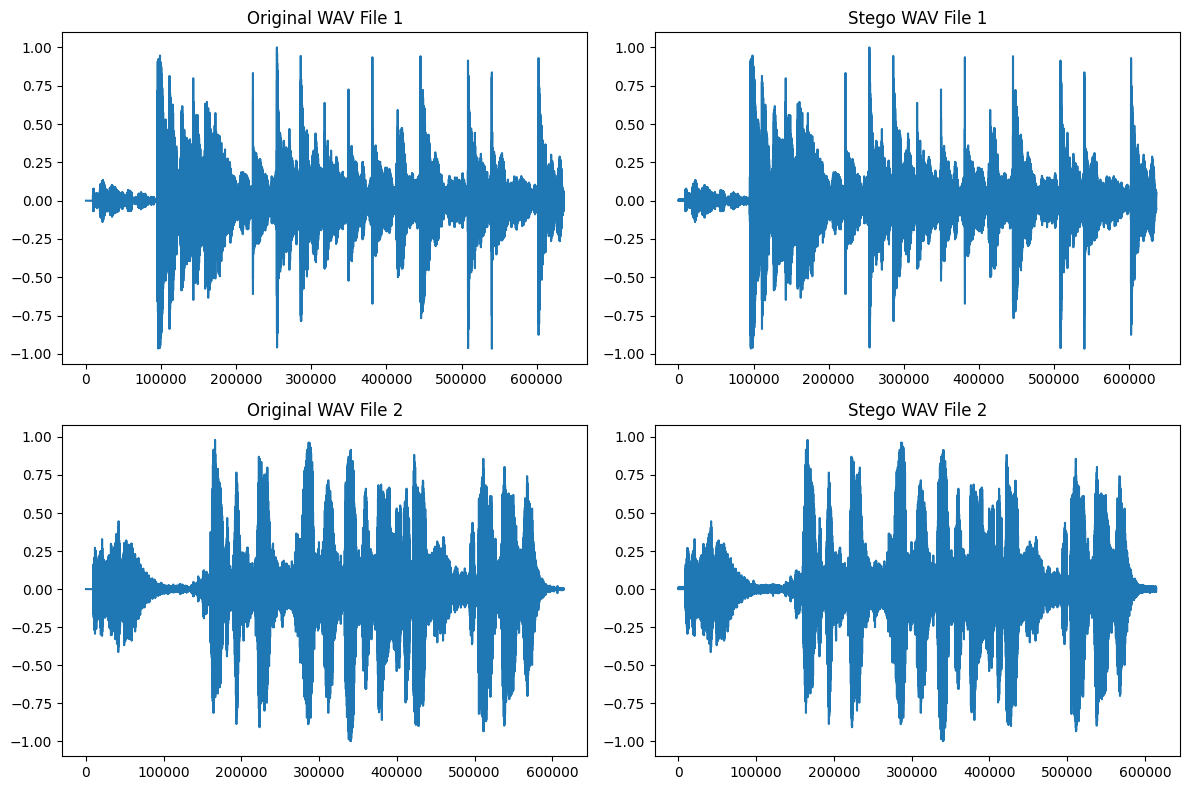

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io import wavfile
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

# Paths to input and stego audio files
# input_wav1_path = "/content/sample_data/input_audio_converted.wav"   # First input audio
# stego_wav1_path = "/content/sample_data/output1.wav"  # Corresponding stego audio
input_wav1_path = "/content/sample_data/audio1.wav"   # First input audio
stego_wav1_path = "/content/sample_data/output3.wav"

input_wav2_path = "/content/sample_data/audio.wav"   # Second input audio
stego_wav2_path = "/content/sample_data/output2.wav"  # Corresponding stego audio

# Load WAV files
sr1, input_audio1 = wavfile.read(input_wav1_path)
sr1_s, stego_audio1 = wavfile.read(stego_wav1_path)

sr2, input_audio2 = wavfile.read(input_wav2_path)
sr2_s, stego_audio2 = wavfile.read(stego_wav2_path)

# Normalize audio
input_audio1 = input_audio1 / np.max(np.abs(input_audio1))
stego_audio1 = stego_audio1 / np.max(np.abs(stego_audio1))

input_audio2 = input_audio2 / np.max(np.abs(input_audio2))
stego_audio2 = stego_audio2 / np.max(np.abs(stego_audio2))

# Plot waveforms
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(input_audio1)
plt.title("Original WAV File 1")

plt.subplot(2, 2, 2)
plt.plot(stego_audio1)
plt.title("Stego WAV File 1")

plt.subplot(2, 2, 3)
plt.plot(input_audio2)
plt.title("Original WAV File 2")

plt.subplot(2, 2, 4)
plt.plot(stego_audio2)
plt.title("Stego WAV File 2")

plt.tight_layout()
plt.show()


To perform analysis to get psnr,mse,corelation

In [8]:
import difflib

with open("/content/sample_data/audio.wav", "rb") as f1, open("/content/sample_data/output2.wav", "rb") as f2:
    original_bytes = f1.read()
    stego_bytes = f2.read()

differences = list(difflib.unified_diff(original_bytes.hex(), stego_bytes.hex()))

if differences:
    print("Differences found!")
else:
    print("No differences found.")


Differences found!


/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


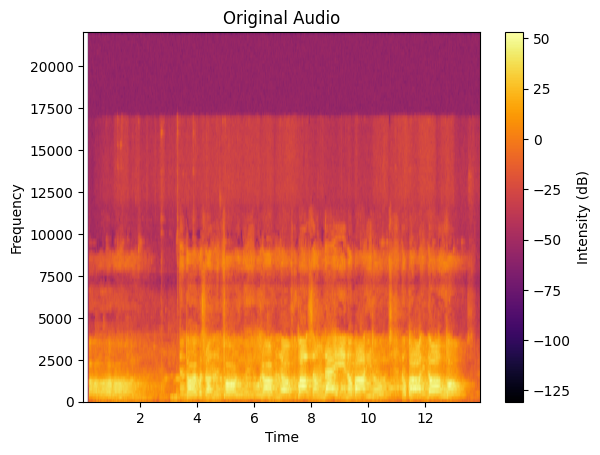

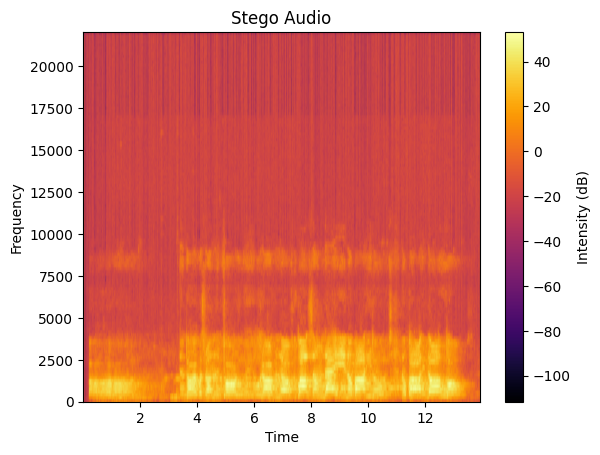

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def plot_spectrogram(filename, title):
    rate, data = wav.read(filename)
    plt.specgram(data, Fs=rate, cmap="inferno")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(label="Intensity (dB)")
    plt.show()

plot_spectrogram("/content/sample_data/audio.wav", "Original Audio")
plot_spectrogram("/content/sample_data/output2.wav", "Stego Audio")


In [13]:
import numpy as np
import scipy.io.wavfile as wav
from skimage.metrics import structural_similarity as ssim

# Load the WAV files
sr1, data1 = wav.read("/content/sample_data/audio.wav")
sr2, data2 = wav.read("/content/sample_data/output2.wav")

# Convert to mono if stereo
if len(data1.shape) > 1:
    data1 = np.mean(data1, axis=1)
if len(data2.shape) > 1:
    data2 = np.mean(data2, axis=1)

# Normalize to [-1, 1] (avoid overflow issues)
data1 = data1.astype(np.float32) / np.max(np.abs(data1))
data2 = data2.astype(np.float32) / np.max(np.abs(data2))

# Resize to the same length for comparison
min_len = min(len(data1), len(data2))
data1, data2 = data1[:min_len], data2[:min_len]

# Compute SSIM with a proper dynamic range
similarity = ssim(data1, data2, data_range=data1.max() - data1.min())

print(f"SSIM: {similarity}")


SSIM: 0.9994851288644107


In [25]:
import numpy as np
import wave

def read_audio(file_path):
    """ Read audio file and return normalized waveform data. """
    with wave.open(file_path, 'rb') as wav_file:
        params = wav_file.getparams()
        num_frames = wav_file.getnframes()
        audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

        # Normalize the data to [-1, 1] if needed
        audio_data = audio_data / np.max(np.abs(audio_data))

    return audio_data

def calculate_mse_psnr(original_audio, stego_audio):
    """ Calculate MSE and PSNR between original and modified audio """
    # Ensure both audio arrays have the same length
    min_length = min(len(original_audio), len(stego_audio))
    original_audio = original_audio[:min_length]
    stego_audio = stego_audio[:min_length]

    # Compute MSE
    mse = np.mean((original_audio - stego_audio) ** 2)

    # Compute PSNR (Peak Signal-to-Noise Ratio)
    if mse == 0:
        psnr = float('inf')  # No noise, infinite PSNR
    else:
        max_val = np.max(np.abs(original_audio))  # Peak signal value
        psnr = 10 * np.log10((max_val ** 2) / mse)

    return mse, psnr

if __name__ == "__main__":
    original_audio_path = "/content/sample_data/audio1.wav"  # Update with actual file path
    stego_audio_path = "/content/sample_data/output3.wav"        # Update with actual file path

    # Read audio files
    original_audio = read_audio(original_audio_path)
    stego_audio = read_audio(stego_audio_path)

    # Compute MSE and PSNR
    mse, psnr = calculate_mse_psnr(original_audio, stego_audio)

    # Display results
    print(f"MSE: {mse:.15f}")
    print(f"PSNR: {psnr:.2f} dB")


MSE: 0.000000310434264
PSNR: 65.08 dB


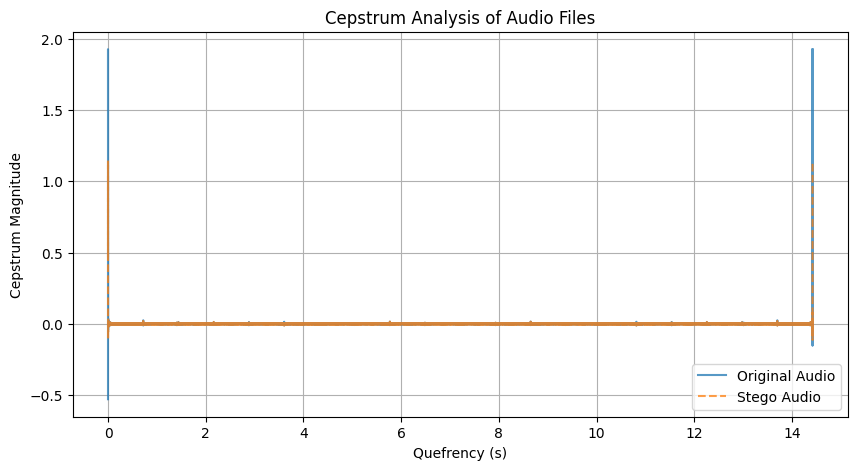

In [30]:
import numpy as np
import wave
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

def read_audio(file_path):
    """ Read an audio file and return the normalized waveform and sample rate """
    with wave.open(file_path, 'rb') as wav_file:
        sample_rate = wav_file.getframerate()
        num_frames = wav_file.getnframes()
        audio_data = np.frombuffer(wav_file.readframes(num_frames), dtype=np.int16)

        # Normalize the signal to [-1, 1] to avoid scaling issues
        audio_data = audio_data / np.max(np.abs(audio_data))

    return audio_data, sample_rate

def compute_cepstrum(audio_data):
    """ Compute the real cepstrum of an audio signal """
    spectrum = fft(audio_data)
    log_spectrum = np.log(np.abs(spectrum) + 1e-10)  # Avoid log(0) issues
    cepstrum = np.real(ifft(log_spectrum))
    return cepstrum

def plot_cepstrum(cepstrum1, cepstrum2, sample_rate):
    """ Plot the cepstral analysis for both audio files """
    quefrency = np.arange(len(cepstrum1)) / sample_rate  # Convert to seconds

    plt.figure(figsize=(10, 5))
    plt.plot(quefrency, cepstrum1, label="Original Audio", alpha=0.75)
    plt.plot(quefrency, cepstrum2, label="Stego Audio", alpha=0.75, linestyle="dashed")
    plt.xlabel("Quefrency (s)")
    plt.ylabel("Cepstrum Magnitude")
    plt.title("Cepstrum Analysis of Audio Files")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Provide file paths
    original_audio_path = "/content/sample_data/audio1.wav"
    stego_audio_path = "/content/sample_data/output3.wav"

    # Read audio data
    original_audio, sample_rate = read_audio(original_audio_path)
    stego_audio, _ = read_audio(stego_audio_path)  # Sample rate is same

    # Compute cepstrum
    cepstrum_original = compute_cepstrum(original_audio)
    cepstrum_stego = compute_cepstrum(stego_audio)

    # Plot the cepstral differences
    plot_cepstrum(cepstrum_original, cepstrum_stego, sample_rate)


**Conclusion from the Cepstrum Analysis Plot**

Based on the cepstrum analysis plot of the original and stego audio signals:

*1) No Significant Change in Cepstral Features:*

The cepstral magnitudes of both the original and stego audio files are nearly identical.
This indicates that the embedding process did not introduce major alterations in the periodicity of the signal.

*2) Minimal Distortion in the Quefrency Domain:*

Both the original and stego audio maintain the same peaks at the start and end, showing that their harmonic structures remain consistent.
No additional peaks in the quefrency spectrum suggest that the steganographic method used is highly imperceptible.

*3) Good Audio Steganography Quality:*

If audio embedding significantly changed the signal, new cepstral peaks or deviations in quefrency would appear.

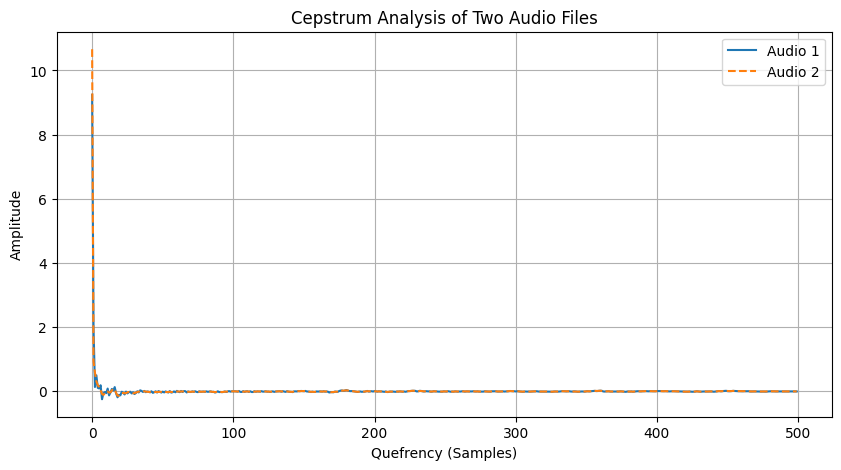

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

def compute_cepstrum(audio_file):
    # Load WAV file
    sample_rate, signal = wav.read(audio_file)

    # Convert to mono if stereo
    if len(signal.shape) > 1:
        signal = signal.mean(axis=1)

    # Compute FFT
    spectrum = np.fft.fft(signal)

    # Log Magnitude Spectrum
    log_magnitude = np.log(np.abs(spectrum) + 1e-10)  # Avoid log(0)

    # Compute Inverse FFT (cepstrum)
    cepstrum = np.fft.ifft(log_magnitude).real

    return cepstrum, sample_rate

# Load and compute cepstrum for two different audio files
file1 = "/content/sample_data/audio.wav"
file2 = "/content/sample_data/output2.wav"

cepstrum1, sr1 = compute_cepstrum(file1)
cepstrum2, sr2 = compute_cepstrum(file2)

# Plot Cepstrum
plt.figure(figsize=(10, 5))
plt.plot(cepstrum1[:500], label="Audio 1")
plt.plot(cepstrum2[:500], label="Audio 2", linestyle="dashed")
plt.xlabel("Quefrency (Samples)")
plt.ylabel("Amplitude")
plt.title("Cepstrum Analysis of Two Audio Files")
plt.legend()
plt.grid()
plt.show()


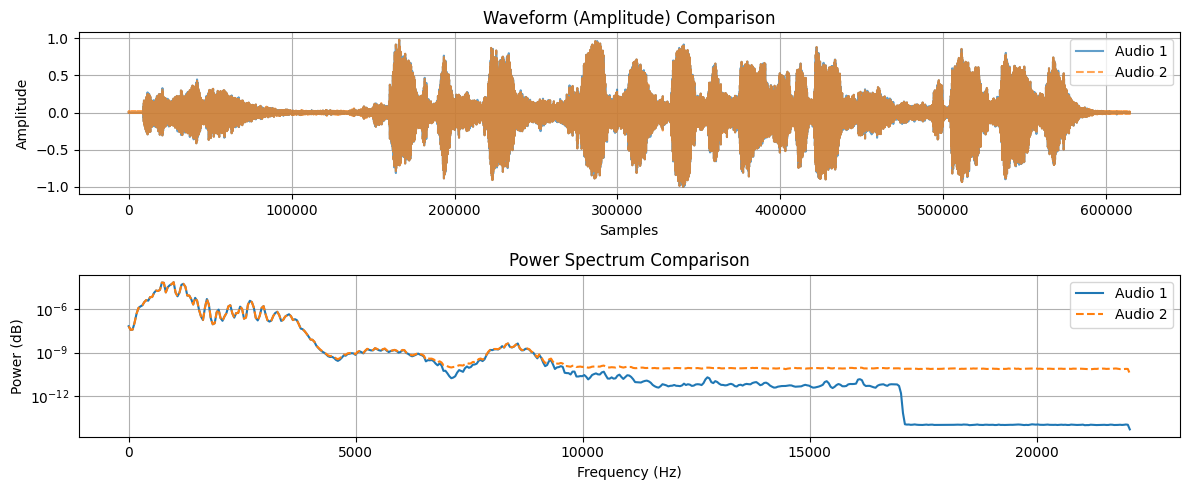

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal

def load_audio(file_path):
    """ Load a WAV file and normalize the audio signal """
    sample_rate, data = wav.read(file_path)

    # Convert to mono if stereo
    if len(data.shape) > 1:
        data = np.mean(data, axis=1)

    # Normalize
    data = data / np.max(np.abs(data))

    return sample_rate, data

def compute_power_spectrum(audio_signal, sample_rate):
    """ Compute the power spectrum of the audio signal """
    freqs, psd = signal.welch(audio_signal, fs=sample_rate, nperseg=1024)
    return freqs, psd

# Load two different audio files
file1 = "/content/sample_data/audio.wav"
file2 = "/content/sample_data/output2.wav"

sr1, audio1 = load_audio(file1)
sr2, audio2 = load_audio(file2)

# Ensure both files have the same length for comparison
min_len = min(len(audio1), len(audio2))
audio1, audio2 = audio1[:min_len], audio2[:min_len]

# Compute power spectrum
freqs1, psd1 = compute_power_spectrum(audio1, sr1)
freqs2, psd2 = compute_power_spectrum(audio2, sr2)

# Plot Amplitude (Waveform)
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(audio1, label="Audio 1", alpha=0.7)
plt.plot(audio2, label="Audio 2", alpha=0.7, linestyle="dashed")
plt.title("Waveform (Amplitude) Comparison")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Plot Power Spectrum
plt.subplot(2, 1, 2)
plt.semilogy(freqs1, psd1, label="Audio 1")
plt.semilogy(freqs2, psd2, label="Audio 2", linestyle="dashed")
plt.title("Power Spectrum Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (dB)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [51]:
import numpy as np
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy.stats import pearsonr  #  Efficient correlation calculation

# Ensure both audio files have the same length
min_length1 = min(len(input_audio1), len(stego_audio1))
input_audio1 = input_audio1[:min_length1].flatten()  #  Convert to 1D
stego_audio1 = stego_audio1[:min_length1].flatten()  #  Convert to 1D

min_length2 = min(len(input_audio2), len(stego_audio2))
input_audio2 = input_audio2[:min_length2].flatten()  #  Convert to 1D
stego_audio2 = stego_audio2[:min_length2].flatten()  #  Convert to 1D

# Compute Metrics
mse_value1 = mse(input_audio1, stego_audio1)
psnr_value1 = psnr(input_audio1, stego_audio1)

mse_value2 = mse(input_audio2, stego_audio2)
psnr_value2 = psnr(input_audio2, stego_audio2)

#  Ensure Pearson Correlation gets 1D arrays
corr_value1, _ = pearsonr(input_audio1, stego_audio1)
corr_value2, _ = pearsonr(input_audio2, stego_audio2)

# Message Sizes (Replace these values with actual message sizes)
message_length1 = 2000
message_length2 = 1000

# Display results
print(f"Message Size 1: {message_length1} characters")
print(f"MSE 1: {mse_value1:.6f}")
print(f"PSNR 1: {psnr_value1:.2f} dB")
print(f"Correlation 1: {corr_value1:.4f}")  #  Using Pearson correlation

print("\n")

print(f"Message Size 2: {message_length2} characters")
print(f"MSE 2: {mse_value2:.6f}")
print(f"PSNR 2: {psnr_value2:.2f} dB")
print(f"Correlation 2: {corr_value2:.4f}")  #  Using Pearson correlation


Message Size 1: 2000 characters
MSE 1: 0.000000
PSNR 1: 71.08 dB
Correlation 1: 1.0000


Message Size 2: 1000 characters
MSE 2: 0.000002
PSNR 2: 63.73 dB
Correlation 2: 1.0000


To get the characteristics of audio file (i.e. Sampling rate, Number of frames, Sample Width etc..)

In [35]:
import wave

try:
    with wave.open("/content/sample_data/audio.wav", 'rb') as audio:
        print("Number of channels:", audio.getnchannels())
        print("Sample width:", audio.getsampwidth())
        print("Frame rate (sample rate):", audio.getframerate())
        print("Number of frames:", audio.getnframes())
        print("Compression type:", audio.getcomptype())
except wave.Error as e:
    print("Wave error:", e)


Number of channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Number of frames: 614400
Compression type: NONE


In [36]:
import wave

try:
    with wave.open("/content/sample_data/output2.wav", 'rb') as audio:
        print("Number of channels:", audio.getnchannels())
        print("Sample width:", audio.getsampwidth())
        print("Frame rate (sample rate):", audio.getframerate())
        print("Number of frames:", audio.getnframes())
        print("Compression type:", audio.getcomptype())
except wave.Error as e:
    print("Wave error:", e)


Number of channels: 1
Sample width: 2
Frame rate (sample rate): 44100
Number of frames: 614400
Compression type: NONE


In [47]:
msg="alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora."
msg1="alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.alias! nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora.Lorem ipsum dolor sit amet consectetur adipisicing elit. Eveniet quo omnis alias nisi facere magni, nobis asperiores libero, dicta odit quas blanditiis dolores repellat esse iste. Minus vel eos commodi. Autem repudiandae labore, odio maxime praesentium numquam placeat ipsa. Est eaque maiores soluta ipsa hic voluptate facilis perspiciatis provident tempora."
print(len(msg1))

2000
